# Лабораторная работа 2 (Задача кластеризация)

ФИО                  |Вариант  |Никнейм
---------------------|---------|----------
Елистратова П. А.    |    6    | TIoJIuHa

**Цель:** научится применять модели кластеризации библиотеки scikit-learn к набору эмпирических данных

**Дано:** excel-файл

**Результат:** число кластеров, обученная модель

**Ход выполнения:** 
1. Загрузить данные из файла (использовать библиотеку Pandas).
2. Визуализировать загруженные данные (диаграмма рассеяния).
3. Оценить число групп (кластеров).
4. Выбрать модель кластеризации.
5. Обучить модель кластеризации на обучающих данных.
6. Проверить качество полученной модели на тестовых данных.
7. Визуализировать результат.




## Загрузка датасета

In [2]:
!pip install scikit-learn
!pip install openpyxl


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
  Obtaining dependency information for openpyxl from https://files.pythonhosted.org/packages/c0/da/977ded879c29cbd04de313843e76868e6e13408a94ed6b987245dc7c8506/openpyxl-3.1.5-py2.py3-none-any.whl.metadata
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Obtaining dependency information for et-xmlfile from https://files.pythonhosted.org/packages/c1/8b/5fe2cc11fee489817272089c4203e679c63b570a5aaeb18d852ae3cbba6a/et_xmlfile-2.0.0-py3-none-any.whl.metadata
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd

raw_data = pd.read_excel('../../tasks/lab2/dataset/lab2-06.xlsx')
raw_data.head(10)

,0,1
0,-1.960649,-8.884399
1,-5.401193,3.874966
2,-1.681666,-6.792541
3,-5.184849,2.559263
4,-4.601743,2.413843
5,-3.443338,4.496611
6,-2.956437,-8.606199
7,-5.262419,4.165785
8,-7.030984,-10.847797
9,-3.640214,1.802642


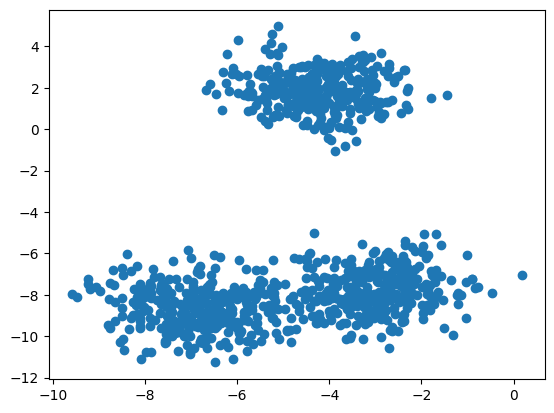

In [2]:
import matplotlib.pyplot as plt

plt.scatter(raw_data[0], raw_data[1])

Из диаграммы рассеяния видно, что всего данные подразделяются на три кластера.

### Метрики

В качестве метрики в данной задаче использовалcя Силуетный коэффицент - измеряет, насколько объекты внутри кластера похожи друг на друга по сравнению с объектами из других кластеров. Значение от -1 до 1, чем ближе к 1 - тем лучше.

In [3]:
from sklearn.metrics import silhouette_score

def print_evaluation(test, pred):
    print("Silhouette score:", silhouette_score(test, pred))

## Создание бейзлайна и оценка качества

In [4]:
def plot_predictions(test_x, test_y, pred_y):
    plt.scatter(test_x, test_y, color="green", label="Исходные данные")
    plt.scatter(test_x, pred_y, color="red", label="Предсказанные данные")
    plt.xlabel("X")
    plt.ylabel('Y')
    plt.legend()
    plt.show()

Разделим исходные данные на обучающую и тестовую выборки

In [6]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(raw_data, test_size=0.2, random_state=42)

Для решения задачи кластеризации воспользуемся KMeans из библиотеки sklearn.

In [7]:
from sklearn.cluster import KMeans

cluster_model = KMeans(n_clusters=3)
cluster_model.fit(train_data)
print("Центры кластеров:")
print(cluster_model.cluster_centers_)

Центры кластеров:
[[-2.98217104 -7.82453942]
 [-4.23733595  1.8977035 ]
 [-6.86467215 -8.6392498 ]]


In [8]:
cluster_pred = cluster_model.predict(test_data)
print_evaluation(test_data, cluster_pred)

Silhouette score: 0.6652094232784255


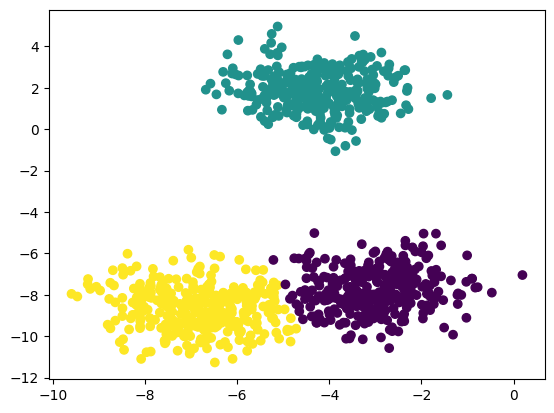

In [9]:
labels = cluster_model.predict(raw_data)
plt.scatter(raw_data[0].to_frame(), raw_data[1].to_frame(), c=labels)

С помощью KMeans удалось успешно разделить наши данные на три кластера, что хорошо видно на диаграмме рассеивания.

Попробуем разделить данные на большее число кластеров.

n_clusters = 2
Silhouette score: 0.7649710333539604

n_clusters = 3
Silhouette score: 0.6652094232784255

n_clusters = 4
Silhouette score: 0.6004111231120324

n_clusters = 5
Silhouette score: 0.5297206017282104

n_clusters = 6
Silhouette score: 0.40702878585729285

n_clusters = 7
Silhouette score: 0.32714875073862615



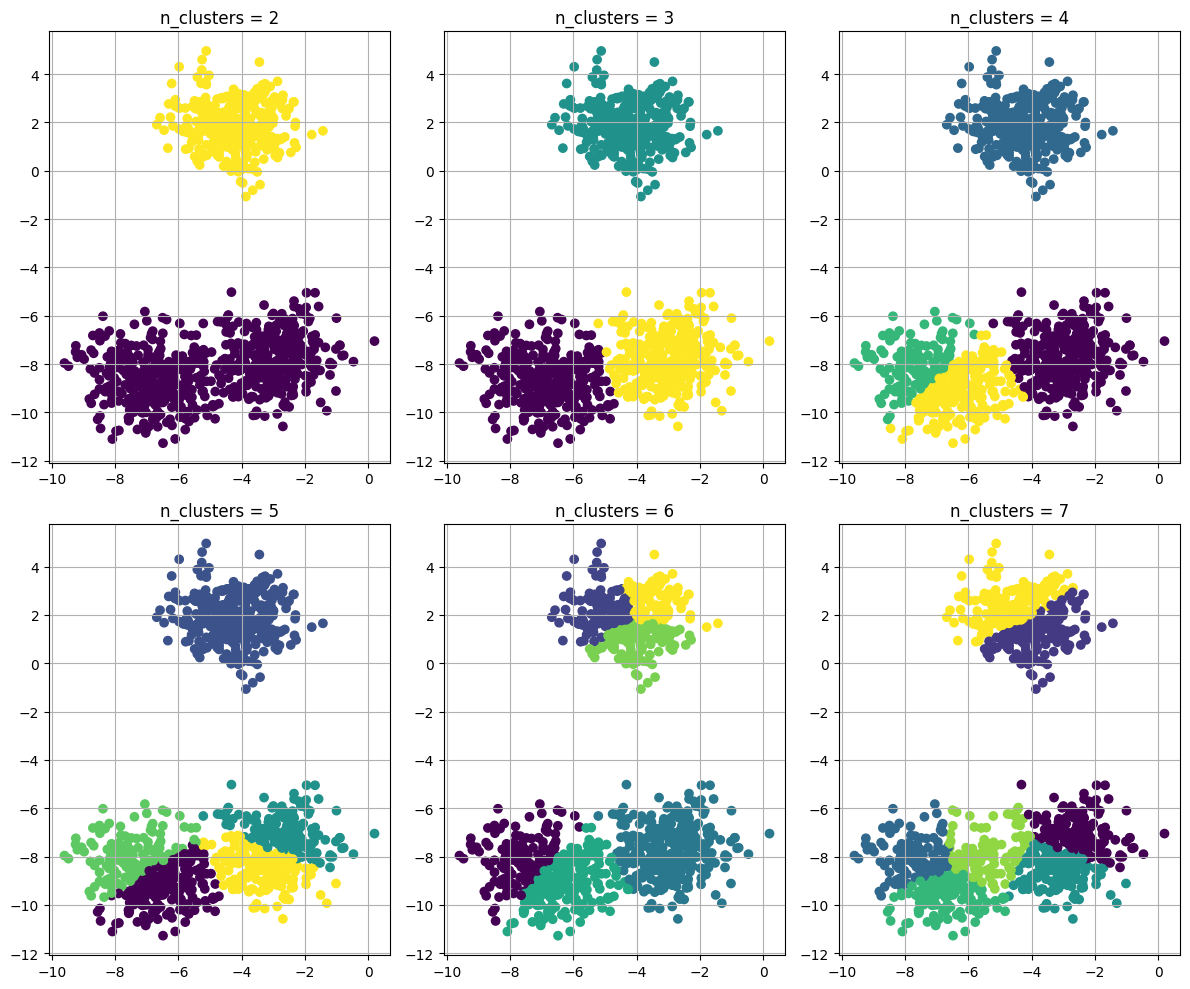

In [10]:
n_clusters = [2, 3, 4, 5, 6, 7]
plt.figure(figsize=(12, 10))

for i, k in enumerate(n_clusters, 1):
    model = KMeans(n_clusters=k)
    model.fit(train_data)
    pred = model.predict(test_data)
    print(f"n_clusters = {k}")
    print_evaluation(test_data, pred)
    print()

    labels = model.predict(raw_data)
    plt.subplot(2, 3, i)
    plt.scatter(raw_data[0].to_frame(), raw_data[1].to_frame(), c=labels)
    plt.title(f"n_clusters = {k}")
    plt.grid(True)

plt.tight_layout()
plt.show()

Можно сделать выводы о том, что KMeans достаточно хорошо решает задачу кластеризации. Силуетный коэффицент при разделении на кластеры показывает, что чем больше кластеров, тем менее они различимы становятся между собой, но тем не менее при эксперименте показатель всё равно остается ближе к 1, что хорошо.

## Выводы

При выполнении данной лаборатоной работы удалось поработать с библиотекой scikit-learn для решения задачи кластеризации.

Оценка по выбранной метрике:

|       | Silhouette score |
|-------|------------------|
|KMeans |      0.665       |